# Introducción a la Programación en MATLAB (C6)

Mauricio Tejada

ILADES - Universidad Alberto Hurtado

Agosto 2017

## Contenidos

- [Aplicaciones I](#6.-Aplicaciones-I)
    - [Modelo Insumo-Producto](#6.1-Modelo-Insumo-Producto)
    - [Equilibrio de Mercado con Dos Bienes](#6.2-Equilibrio-de-Mercado-con-Dos-Bienes)
    - [Mínimos Cuadrados Ordinarios](#6.3-M%C3%ADnimos-Cuadrados-Ordinarios)

## 6. Aplicaciones I

### 6.1 Modelo Insumo-Producto 

*Aplicación tomada del libro "Matemática para Economistas con Excel y Matlab" de Alicia Bernardello y coautores*

Características del modelo:

- Describe relaciones interindustriales o intersectoriales.
- Usa dichas relaciones para predecir cambios en la demanda para predecir causados por cambios en la demanda autónoma del los productos finales.

Suponga una economía con tres sectores: 


| Prod/Ins |  I  |  II |  III |
|--------------|--------|-----|------|
|  I           |0.2  |0.6  |0     |
|  II          |0.2  |0    |0.2   |
|  III         |0.4  |0.2  |0.5   |

- Columna 1: Por cada peso producido del producto I se usan: 0.2 pesos del mismo producto, 0.2 pesos del producto II, y 0.4 pesos del producto III.
- La demanda de cada una de las tres industrias está compuesta de la demanda derivada de las otras industrias y la demanda autónoma:

\begin{eqnarray}
x_1 &=& 0.2x_1+0.6x_2+d_1 \\ 
x_2 &=& 0.2x_1+0.2x_3+d_2 \\ 
x_3 &=& 0.4x_1+0.2x_2+0.5x_3+d_3 \\
\end{eqnarray}

- Definamos la matriz de coeficientes técnicos como:

In [1]:
clear all;
A = [0.2 0.6 0; 0.2 0 0.2; 0.4 0.2 0.5]

A =

    0.2000    0.6000         0
    0.2000         0    0.2000
    0.4000    0.2000    0.5000


- Si definimos los vectores $x=(x_1,x_2,x_3)'$ y $d=(d_1,d_2,d_3)'$ tenemos:

$$x = Ax + d$$

- Entonces:

$$x=(I-A)^{-1}d$$

- La matriz $I-A$ es denominada matriz de Leontief.
- La matriz $A$ tiene todo sus autovalores en el círculo unitario y $I-A$ es no singular. Entonces $(I-A)^{-1}$ es no negativa.

In [2]:
eigA = eig(A)
detL = det(eye(3)-A)

eigA =

    0.7445
    0.1432
   -0.1877


detL =

    0.2600


In [3]:
invL = inv(eye(3)-A)

invL =

    1.7692    1.1538    0.4615
    0.6923    1.5385    0.6154
    1.6923    1.5385    2.6154


- Si $d_1=100$, $d_2=50$, y $d_3=200$, las demandas sectoriales serían:

In [4]:
d = [100; 50; 200]
x = invL*d

d =

   100
    50
   200


x =

  326.9231
  269.2308
  769.2308


- Nos interesa calcular el efecto de un cambio en la demanda autónoma de un producto sobre la demanda total (dadas las relaciones entre sectores).

$$\Delta x = (I-A)^{-1} \Delta d$$

- Suponga ahora $d'_1=110$, $d'_2=100$, y $d'_3=180$.

In [5]:
d2 = [110; 100; 180];
Dd = d2-d
Dx = invL*Dd

Dd =

    10
    50
   -20


Dx =

   66.1538
   71.5385
   41.5385


### 6.2 Equilibrio de Mercado con Dos Bienes

*Aplicación tomada del libro "Matemática para Economistas con Excel y Matlab" de Alicia Bernardello y coautores*

El Modelo:

- Función de Demanda del producto 1: $$Q_{d1} = 40 - 2 P_1 +  P_2$$
- Función de Oferta del producto 1: $$Q_{o1} = -5 + 3 P_1 - P_2$$
- Equilibrio en el mercado 1: $$Q_{d1}=Q_{o1}=Q_1$$
- Función de Demanda del producto 2: $$Q_{d2} = 90 + P_1 - P_2$$
- Función de Oferta del producto 2: $$Q_{o2} = -2 + 2 P_2 $$
- Equilibrio en el mercado 2: $$Q_{d2}=Q_{o2}=Q_2$$

El modelo puede ser resuelto usando el método de reemplazo para encontrar la solución al sistema de ecuaciones. Bastante tedioso. Definamos mas bien el siguiente vector: $$x = (Q_1,Q_2,P_1,P_2)'$$

Definamos entonces: $$ Ax = b$$

La solución del sistema de ecuaciones es entonces (si $A$ es invertible): $$x = A^{-1} \times  b$$



In [6]:
A = [1 0 2 -1;
     1 0 -3 1;
     0 1 -1 1;
     0 1 0 -2]
b = [40; -5; 90; -2]
dA = det(A)

A =

     1     0     2    -1
     1     0    -3     1
     0     1    -1     1
     0     1     0    -2


b =

    40
    -5
    90
    -2


dA =

   -13


Solución:

In [7]:
x = A \ b   % alternativamente x =inv(A)*b

x =

   29.7692
   75.6923
   24.5385
   38.8462


Entonces: $Q_1=29.7$ ,$P_1=24.5$, $Q_2=75.7$, $P_2=38.8$.

### 6.3 Mínimos Cuadrados Ordinarios

Construiremos dos vectores $X_1$ y $X_2$ de $N \times 1$ cada uno y con ello un vector $y$ de acuerdo a: 

$$y_i = 3 + 0.5X_{1i} + 0.9X_{2i} + \epsilon_i$$

donde $X_{1i} \sim N(1,4)$, $X_{2i} \sim N(2,4)$ y $\epsilon \sim N(0,1)$.

A partir de estos datos usaremos la fórmula estándar de MCO para encontrar los coeficientes estimados. $$\hat{\beta} = (X'X)^{-1} X'y$$

- Generando Datos:

In [8]:
N = 100;
X1 = 1 + 2*randn(N,1);
X2 = 2 + 2*randn(N,1);
eps = randn(N,1);
y  = 3 + 0.5*X1 +0.9*X2 + eps;

data = [y X1 X2];

dlmwrite('DatosMCO.txt',data);

- Cargando Datos y estimado los parámetros:

In [9]:
clear all;
whos

In [10]:
impdata = importdata('DatosMCO.txt');
whos;

Name           Size            Bytes  Class     Attributes

  impdata      100x3              2400  double


In [11]:
[N, K] = size(impdata);
y = impdata(:,1);
X1 = impdata(:,2);
X2 = impdata(:,3);

X = [ones(N,1) X1 X2];

beta = (X'*X)\(X'*y)   % alternativa beta = inv(X'*X)*(X'*y)

beta =

    2.9913
    0.5640
    0.8020


- Graficando la predicción y los errores del modelo. 

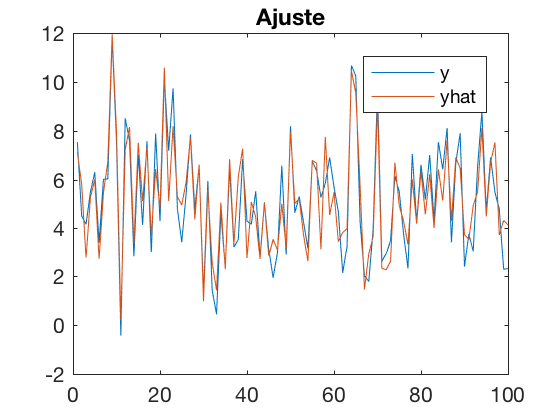

In [12]:
err = y - X*beta;
yhat = X*beta;

plot([y yhat]);
title('Ajuste')
legend('y','yhat');

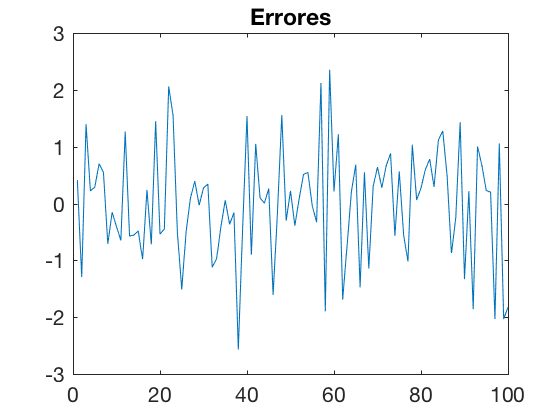

In [13]:
plot(err);
title('Errores');